In [300]:
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, precision_recall_curve,accuracy_score

## funkcja do zapisu w raporcie

In [301]:
zestawienie_koszt_prog = pd.DataFrame(columns=['próg','precyzja','czułość','dokładność', 'tp','tn','fp','fn','zysk_lub_strata'])

In [302]:
def aktualizuj_raport(raport,prog,precyzja,cz,dokl, tp,tn,fp,fn,zysk_lub_strata):
    return raport.append({'próg':prog,'precyzja':precyzja,'czułość':cz,'dokładność':dokl,
                          'tp':tp,'tn':tn,'fp':fp,'fn':fn,'zysk_lub_strata':zysk_lub_strata},ignore_index=True)

# wczytanie danych i wytrenowanie drzewka

In [303]:
dane1 = pd.read_excel('zb1.xlsx')
cechy = ['AssetZip', 'Lat', 'Long', 'AvgRepairCost',
       'Age', 'PMLate', 'WaterExposure', 'MultipleConnects', 'Storm',
       'Overloads', 'MilesFromOcean', 'Repairs', 'GE', 'Other',
       'Schneider Electric', 'Siemens', '1-Phase Pole Transformer',
       '3-Phase Transformer', 'DF-series Transformer', 'Padmount Transformer',
       'Voltage Transformer']
scaler = StandardScaler()
przeskalowane = scaler.fit_transform(dane1[cechy])
dane_przeskalowane = pd.DataFrame(data=przeskalowane,columns=cechy)
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)
for train_index, test_index in split.split(dane_przeskalowane, dane_przeskalowane[['PMLate','Storm','WaterExposure','MilesFromOcean']]):
    X_train= dane_przeskalowane.loc[train_index]
    y_train = dane1['Status'].loc[train_index]
    X_test = dane_przeskalowane.loc[test_index]
    y_test = dane1['Status'].loc[test_index]


In [304]:
tmp_cechy = ['Age', 'Schneider Electric', 'Siemens', '1-Phase Pole Transformer', '3-Phase Transformer', 'Overloads', 'MilesFromOcean']

In [305]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train[tmp_cechy],y_train)
yt_pred = clf.predict(X_train[tmp_cechy])
confusion_matrix(y_train,yt_pred)
    

array([[511,  27],
       [ 62, 601]], dtype=int64)

In [306]:
confusion_matrix(y_train,yt_pred)[0,1]

27

In [307]:
max_depths = np.linspace(1, 17, 17, endpoint=True)

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []
caly_zb_wyniki_acc = []
caly_zb_wyniki_prec = []
caly_zb_wyniki_cz = []

dokladnosc = []
y = dane1['Status']
ile_cech = list(range(1,len(tmp_cechy)))

for element in max_depths:
        clf = DecisionTreeClassifier(max_depth=element,random_state=0)
        clf.fit(X_train[tmp_cechy],y_train)
        
        y_cale_pred = clf.predict(dane_przeskalowane[tmp_cechy])
        yt_pred = clf.predict(X_train[tmp_cechy])
        y_pred = clf.predict(X_test[tmp_cechy])
    
        
        zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
        zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
        caly_zb_wyniki_acc.append(accuracy_score(y,y_cale_pred))
        caly_zb_wyniki_prec.append(precision_score(y,y_cale_pred))
        caly_zb_wyniki_cz.append(recall_score(y,y_cale_pred))
        
        precyzja = precision_score(y_test,y_pred)
        cz = recall_score(y_test,y_pred)
        dokl=accuracy_score(y_test,y_pred)
        
        cm = confusion_matrix(y_test,y_pred)
        tp =cm[0,0]
        tn =cm[1,0]
        fp =cm[0,1]
        fn = cm[1,1]
        
        wynik = tp*(100) + tn*(-30) + fp*(-100) + fn*(0)
        prog = 100*(tn+fp)/(tp+tn+fp+fn)
        
        zestawienie_koszt_prog = aktualizuj_raport(zestawienie_koszt_prog,prog,precyzja,cz,dokl, tp,tn,fp,fn,wynik)

        

In [308]:
zestawienie_koszt_prog.sort_values('zysk_lub_strata')

,próg,precyzja,czułość,dokładność,tp,tn,fp,fn,zysk_lub_strata
3,31.650485,0.656566,0.905923,0.683495,92.0,27.0,136.0,260.0,-5210.0
1,35.533981,0.649425,0.787456,0.644660,106.0,61.0,122.0,226.0,-3430.0
0,36.310680,0.648810,0.759582,0.636893,110.0,69.0,118.0,218.0,-2870.0
5,27.961165,0.699164,0.874564,0.720388,120.0,36.0,108.0,251.0,120.0
2,33.203883,0.690789,0.731707,0.667961,134.0,77.0,94.0,210.0,1690.0
4,27.184466,0.719403,0.839721,0.728155,134.0,46.0,94.0,241.0,2620.0
6,23.300971,0.750751,0.871080,0.766990,145.0,37.0,83.0,250.0,5090.0
7,21.941748,0.773585,0.857143,0.780583,156.0,41.0,72.0,246.0,7170.0
8,21.747573,0.790698,0.829268,0.782524,165.0,49.0,63.0,238.0,8730.0
10,20.388350,0.799342,0.846690,0.796117,167.0,44.0,61.0,243.0,9280.0


In [367]:
raport = pd.DataFrame()
raport = zestawienie_koszt_prog.sort_values('zysk_lub_strata')
zestawienie_koszt_prog.to_excel('zestawienie_koszt_strata_raport.xlsx')

# zależność: precyzji, czułości i dokładności od zysku/stary

### precyzja a stata/zysk

In [310]:
prog1=0
prog2=0
cz1 =0
cz2=0
d1=0
d2=0
prec=0

for i, element in enumerate(raport['zysk_lub_strata']):
    if element >=0:
        prog1 = raport['precyzja'].iloc[i-1]
        prog2 = raport['precyzja'].iloc[i]
        cz1=raport['czułość'].iloc[i-1]
        cz2= raport['czułość'].iloc[i]
        d1=raport['dokładność'].iloc[i-1]
        d2= raport['dokładność'].iloc[i]
        break
    
prec = (prog1 + prog2)/2 
cz = (cz1+cz2)/2
d =(d1+d2)/2

In [311]:
raport['pr_prec'] = prec
raport['pr_cz'] = cz
raport['pr_d'] = d

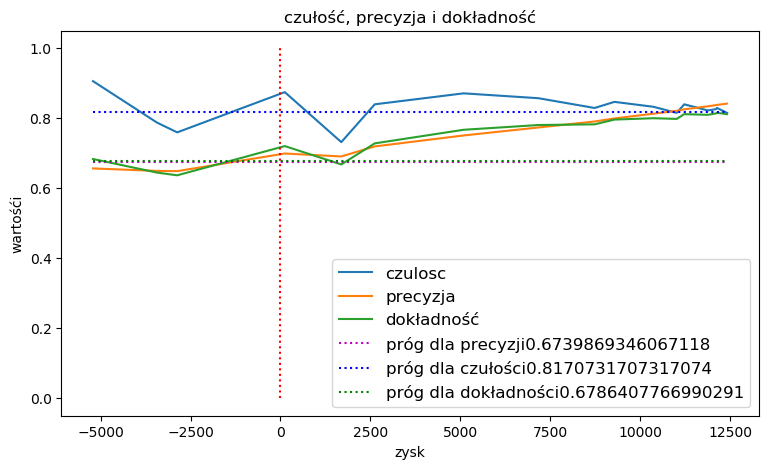

In [312]:
x = raport['zysk_lub_strata']

#fig, ax = plt.subplots() 
plt.figure(figsize=(9, 5))   
plt.plot(x,raport['czułość'], label='czulosc')  
plt.plot(x,raport['precyzja'],  label='precyzja')  
plt.plot(x,raport['dokładność'],  label='dokładność') 
plt.plot([0., 0.], [0., 1.0], "r:") 

plt.plot(x, raport['pr_prec'], "m:", label='próg dla precyzji'+ str(prec)) 
plt.plot(x, raport['pr_cz'], "b:", label='próg dla czułości'+ str(cz)) 
plt.plot(x, raport['pr_d'], "g:", label='próg dla dokładności'+ str(d)) 
plt.xlabel('zysk')  
plt.ylabel('wartośći')  
plt.title("czułość, precyzja i dokładność")  

plt.legend(fontsize=12)


# procent źle sklasyfikowanych a dokładność klasyfikatora


In [313]:
raport = raport.sort_values('próg')


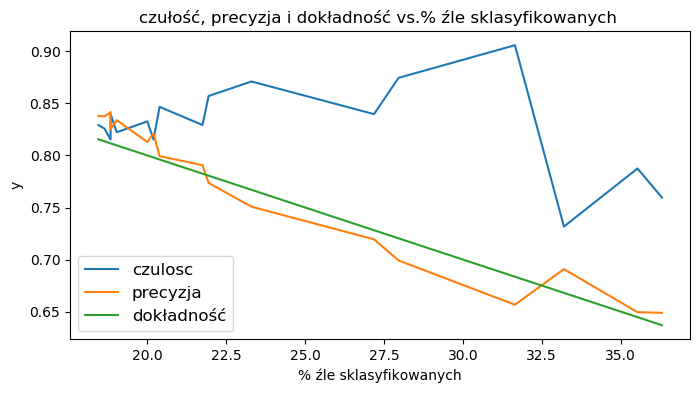

In [314]:
x = raport['próg']

#fig, ax = plt.subplots() 
plt.figure(figsize=(8, 4))   
plt.plot(x,raport['czułość'], label='czulosc')  
plt.plot(x,raport['precyzja'],  label='precyzja')  
plt.plot(x,raport['dokładność'],  label='dokładność') 


plt.xlabel('% źle sklasyfikowanych')  
plt.ylabel('y')  
plt.title("czułość, precyzja i dokładność vs.% źle sklasyfikowanych ")  

plt.legend(fontsize=12)

# zysk-koszt a odsetek źle sklasyfikowanych

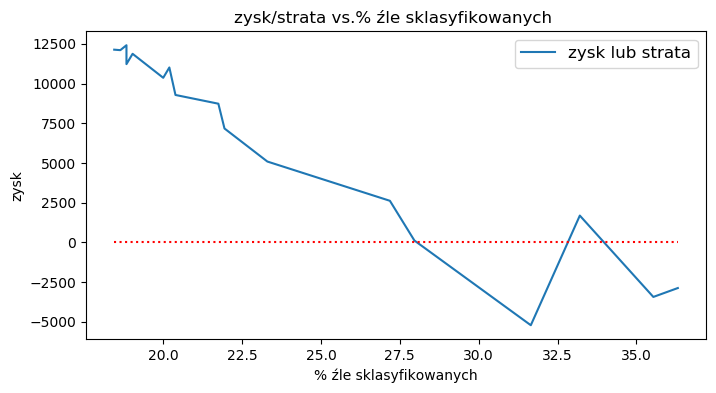

In [315]:
x = raport['próg']
raport['zero'] = 0
#fig, ax = plt.subplots() 
plt.figure(figsize=(8, 4))   
plt.plot(x,raport['zysk_lub_strata'], label='zysk lub strata')  

plt.plot(x,raport['zero'], 'r:')

plt.xlabel('% źle sklasyfikowanych')  
plt.ylabel('zysk')  
plt.title("zysk/strata vs.% źle sklasyfikowanych ")  

plt.legend(fontsize=12)

# ustalenie polityki dla nowych 20 transformatorów

In [316]:
nowe = pd.read_excel('awarie_transf_new.xlsx')

In [320]:
nowe_dane = pd.DataFrame()

In [319]:
#cechy które wykorzystuje klasyfikator
tmp_cechy = ['Age', 'Schneider Electric', 'Siemens', '1-Phase Pole Transformer', '3-Phase Transformer', 'Overloads', 'MilesFromOcean']

In [321]:
nowe_dane['Age'] = nowe['Age']

In [325]:
nowe_dane['Schneider Electric']=0
for i, element in enumerate(nowe['Manufacturer']):
    if nowe['Manufacturer'].iloc[i] == 'Schneider Electric':
        nowe_dane['Schneider Electric'].iloc[i] = 1

c:\users\kowalma3\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [329]:
nowe_dane['Siemens']=0
for i, element in enumerate(nowe['Manufacturer']):
    if nowe['Manufacturer'].iloc[i] == 'Siemens':
        nowe_dane['Siemens'].iloc[i] = 1

In [332]:
nowe_dane['1-Phase Pole Transformer']=0
for i, element in enumerate(nowe['AssetType']):
    if nowe['AssetType'].iloc[i] == '1-Phase Pole Transformer':
        nowe_dane['1-Phase Pole Transformer'].iloc[i] = 1

c:\users\kowalma3\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [334]:
nowe_dane['3-Phase Transformer']=0
for i, element in enumerate(nowe['AssetType']):
    if nowe['AssetType'].iloc[i] == '3-Phase Transformer':
        nowe_dane['3-Phase Transformer'].iloc[i] = 1

In [336]:
map_overloads = {'0-19':0, '20-60':1, '60+':2 }
map_milesfromocean = {'0-30':0, '30-60':1, '60-90':2, 'More than 90':3}

In [337]:
nowe_dane['Overloads'] = nowe['Overloads'].replace(map_overloads)
nowe_dane['MilesFromOcean'] = nowe['MilesFromOcean'].replace(map_milesfromocean)


In [338]:
nowe_dane

,Age,Schneider Electric,Siemens,1-Phase Pole Transformer,3-Phase Transformer,Overloads,MilesFromOcean
0,80.0,0,0,0,0,2,0
1,80.0,0,0,1,0,2,1
2,77.1,1,0,1,0,1,2
3,77.1,1,0,1,0,1,2
4,58.5,1,0,0,1,2,3
5,50.0,0,0,1,0,1,0
6,30.5,1,0,0,0,1,0
7,26.7,1,0,0,0,2,0
8,23.9,0,0,0,0,1,3
9,19.9,0,0,1,0,1,0


In [339]:
scaler = StandardScaler()
przeskalowane = scaler.fit_transform(nowe_dane)


In [357]:
nowe['Predykcja']=clf.predict(przeskalowane) #ostatni klasyfikator zapisany w zmiennej clf, jest w tym pliku najlepszy

In [358]:
def zmien_status(x):
    if x == 1:
        return 'OK'
    else:
        return 'Fail'

In [359]:
nowe['Predykcja'] = nowe['Predykcja'].apply(zmien_status)

In [365]:
nowe['Predykcja'].value_counts()

OK      16
Fail     4
Name: Predykcja, dtype: int64

In [366]:
nowe.to_excel('predykca.xlsx')